# INTEGER PROGRAMMING



In [ ]:
pip install pulp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 40.5 MB/s eta 0:00:00


# 1. INTEGER LINER PROGRAMMING : Optimal Order Quantities

Solution Status: Optimal
Ordered Quantities by Product Type:
cosmetics: 10232.0
haircare: 11967.0
skincare: 19123.0
Ordered Quantities for each SKU:
SKU0: 744.0
SKU1: 683.0
SKU2: 7.0
SKU3: 60.0
SKU4: 866.0
SKU5: 57.0
SKU6: 54.0
SKU7: 333.0
SKU8: 145.0
SKU9: 966.0
SKU10: 945.0
SKU11: 914.0
SKU12: 236.0
SKU13: 169.0
SKU14: 508.0
SKU15: 460.0
SKU16: 278.0
SKU17: 81.0
SKU18: 610.0
SKU19: 139.0
SKU20: 293.0
SKU21: 532.0
SKU22: 813.0
SKU23: 307.0
SKU24: 205.0
SKU25: 60.0
SKU26: 294.0
SKU27: 305.0
SKU28: 346.0
SKU29: 208.0
SKU30: 267.0
SKU31: 162.0
SKU32: 692.0
SKU33: 612.0
SKU34: 601.0
SKU35: 407.0
SKU36: 945.0
SKU37: 938.0
SKU38: 636.0
SKU39: 98.0
SKU40: 843.0
SKU41: 492.0
SKU42: 133.0
SKU43: 562.0
SKU44: 906.0
SKU45: 0.0
SKU46: 767.0
SKU47: 906.0
SKU48: 0.0
SKU49: 2.0
SKU50: 602.0
SKU51: 54.0
SKU52: 756.0
SKU53: 146.0
SKU54: 589.0
SKU55: 604.0
SKU56: 68.0
SKU57: 222.0
SKU58: 886.0
SKU59: 384.0
SKU60: 339.0
SKU61: 85.0
SKU62: 184.0
SKU63: 192.0
SKU64: 61.0
SKU65: 400.0
SKU66: 691.0
SKU67: 5

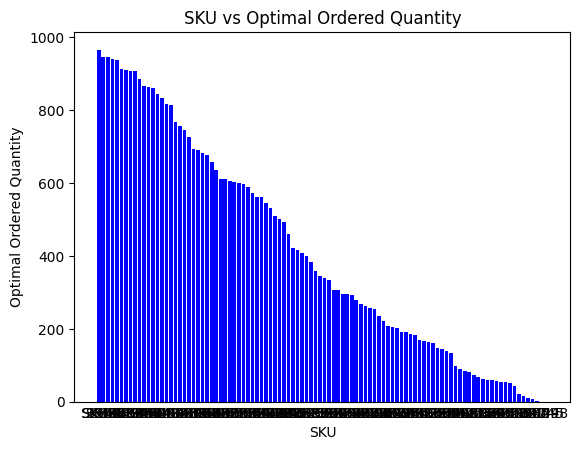

In [ ]:
import pandas as pd
from pulp import LpMinimize, LpProblem, LpStatus, lpSum, LpVariable

# Load the data
data_path = 'supply_chain_data.csv'
supply_chain_data = pd.read_csv(data_path)


# Calculate variable costs and add to dataframe
supply_chain_data['Variable Costs'] = supply_chain_data['Costs'] - supply_chain_data['Manufacturing costs']

# Group data by product type and sum relevant columns
grouped_data = supply_chain_data.groupby('Product type').agg({
    'Price': 'mean',  # Assuming average price for simplicity
    'Variable Costs': 'mean',  # Average variable costs
    'Number of products sold': 'sum',
    'Stock levels': 'sum'
}).reset_index()

# Create the LP optimization problem
model = LpProblem("Inventory_Optimization_by_Product_Type", LpMinimize)

# Decision variables: Number of units to order for each product type
order_vars = LpVariable.dicts("Order", grouped_data['Product type'], lowBound=0, cat='Integer')

# Objective: Minimize the total cost including variable costs for each product type
model += lpSum([order_vars[ptype] * (grouped_data.loc[i, 'Price'] + grouped_data.loc[i, 'Variable Costs'])
                for i, ptype in enumerate(grouped_data['Product type'])])

# Constraints: Stock levels must meet the sales demand for each product type
for i, ptype in enumerate(grouped_data['Product type']):
    model += order_vars[ptype] >= grouped_data.loc[i, 'Number of products sold'] - grouped_data.loc[i, 'Stock levels']

# Solve the model
model.solve()


# Output results
if LpStatus[model.status] == 'Optimal':
    solution_status = LpStatus[model.status]
    ordered_quantities = {ptype: order_vars[ptype].value() for ptype in grouped_data['Product type']}
    print("Solution Status:", solution_status)
    print("Ordered Quantities by Product Type:")
    for ptype, quantity in ordered_quantities.items():
        print(f"{ptype}: {quantity}")
else:
    print("The LP model did not solve to optimality.")


# Create the LP optimization problem
model = LpProblem("Inventory_Optimization", LpMinimize)

# Decision variables: Number of units to order for each SKU
order_vars = LpVariable.dicts("Order", supply_chain_data['SKU'], lowBound=0, cat='Integer')

# Objective: Minimize the total purchasing cost
model += lpSum([order_vars[sku] * supply_chain_data.loc[i, 'Price'] for i, sku in enumerate(supply_chain_data['SKU'])])

# Constraints: Stock levels must meet the sales demand
for i, sku in enumerate(supply_chain_data['SKU']):
    model += order_vars[sku] >= supply_chain_data.loc[i, 'Number of products sold'] - supply_chain_data.loc[i, 'Stock levels']

# Solve the model
model.solve()

# Print the solution status and the ordered quantities
solution_status = LpStatus[model.status]
ordered_quantities = {sku: order_vars[sku].value() for sku in supply_chain_data['SKU']}

#print("Solution Status:", solution_status)
print("Ordered Quantities for each SKU:")
for sku, quantity in ordered_quantities.items():
    print(f"{sku}: {quantity}")


import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'supply_chain_data' and 'ordered_quantities' are already loaded and computed

# Create a DataFrame for easy plotting
sku_data = pd.DataFrame({
    'SKU': list(ordered_quantities.keys()),
    'Ordered Quantity': list(ordered_quantities.values())
})

# Sort the DataFrame for better visualization
sku_data = sku_data.sort_values(by='Ordered Quantity', ascending=False)


# Creating the plot
#plt.figure(figsize=(10, 8))  # Set the figure size (optional)
plt.bar(sku_data['SKU'], sku_data['Ordered Quantity'], color='blue')  # Create a bar plot
plt.xlabel('SKU')  # X-axis label
plt.ylabel('Optimal Ordered Quantity')  # Y-axis label
plt.title('SKU vs Optimal Ordered Quantity')  # Title of the plot
plt.tick_params(axis='x', which='both', length=0, width=0)
plt.show()  # Display the plot


Quantities: Each SKU (Stock Keeping Unit) has an associated quantity that you should order to meet the demand while minimizing the total cost, based on the prices provided in the dataset..
Key Points in the Results:
High Order Quantities: SKUs like SKU9 (966 units), SKU10 (945 units), and SKU98 (860 units) have high ordered quantities, which could indicate a high sales volume or low existing stock for these items.
Low or Zero Order Quantities: SKUs like SKU45 and SKU48 have zero ordered quantities. This could imply that the current stock levels already meet or exceed the forecasted demand for these products.
Medium Order Quantities: Most SKUs have varied quantities, indicating a diverse demand across different products, and these quantities are tailored to meet each specific demand.
Strategic Insights:
Inventory Management: The model helps in maintaining sufficient inventory to meet customer demands without overstocking, which is crucial in managing storage costs and reducing wastage due to unsold inventory.
Cost Efficiency: By calculating the exact number of products needed, the model also aims to optimize spending, ensuring that investment in inventory is aligned with sales expectations.
Operational Decisions:
Purchasing Decisions: These results can be directly used to place orders with suppliers, ensuring that each product type is replenished according to the predicted demand.
Financial Planning: Understanding the quantity and cost associated with each SKU aids in better financial planning and budget allocation for inventory purchasing.



# 2. NETWORK GRAPH : Supply Chain Network with:
# SKU Shipping Costs & Lead Times


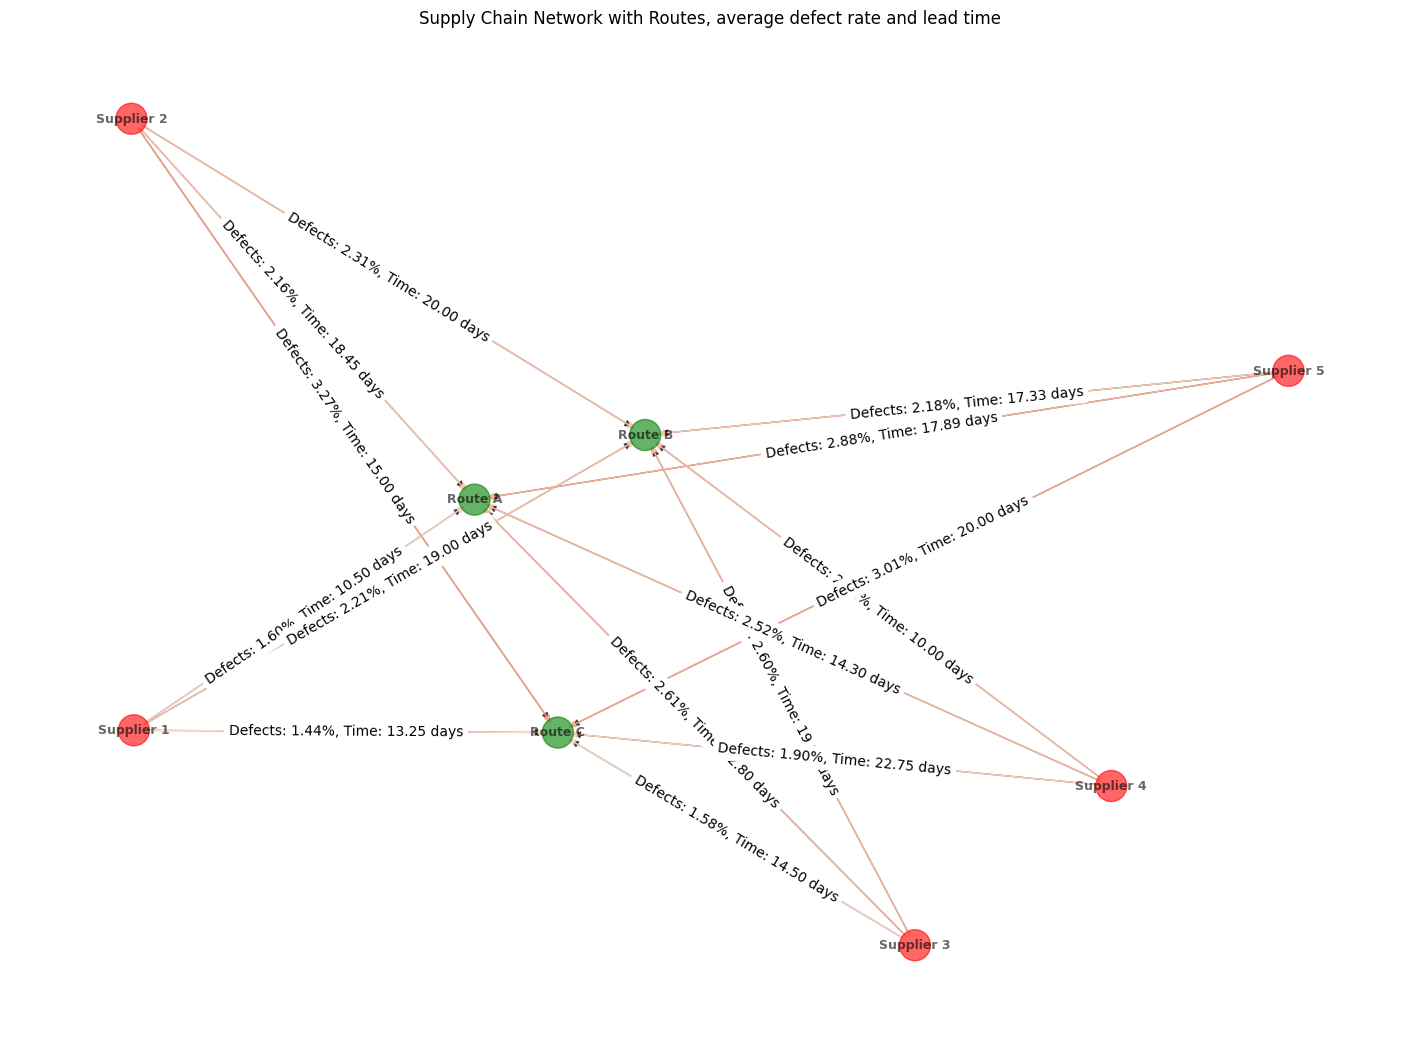

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load your data
data_path = 'supply_chain_data.csv'
df = pd.read_csv(data_path)

def draw_route_supplier_graph(df, title):
    G = nx.DiGraph()

    # Calculate average defect rates and lead times for each supplier-route pair
    avg_data = df.groupby(['Supplier name', 'Routes']).agg({
        'Defect rates': 'mean',
        'Lead time': 'mean'
    }).reset_index()

    # Add nodes and edges with attributes
    for index, row in avg_data.iterrows():
        supplier = row['Supplier name']
        route = row['Routes']
        avg_defect_rate = row['Defect rates']
        avg_lead_time = row['Lead time']
        label = f"Defects: {avg_defect_rate:.2f}%, Time: {avg_lead_time:.2f} days"
        color = plt.cm.Reds(min(1, avg_defect_rate / 10))
        G.add_node(supplier, node_type='supplier', color='red')
        G.add_node(route, node_type='route', color='green')
        G.add_edge(supplier, route, weight=avg_defect_rate, label=label, color=color)


    pos_spring = nx.spring_layout(G, seed=42)
    pos_kamada_kawai = nx.kamada_kawai_layout(G)
    pos_circular = nx.circular_layout(G)

    # Drawing the graph with Kamada-Kawai layout
    plt.figure(figsize=(14, 10))
    node_colors = [nx.get_node_attributes(G, 'color')[node] for node in G.nodes()]
    nx.draw(G, pos_kamada_kawai, with_labels=True, node_color=node_colors, node_size=500,
            font_size=9, font_weight="bold", alpha=0.6)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edges(G, pos_kamada_kawai, edge_color=[d['color'] for u, v, d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos_kamada_kawai, edge_labels=edge_labels)
    plt.title(title)
    plt.show()

# Draw graph
draw_route_supplier_graph(df, 'Supply Chain Network with Routes, average defect rate and lead time')


Supplier and Route Connections: The graph shows a network of suppliers connected to various routes, indicating how products are distributed from these suppliers through specific pathways. Each supplier is linked to multiple routes, suggesting a complex distribution network.
Defect Rates and Lead Times: Edges are labelled with defect rates and lead times, which vary across routes. For instance, routes connected to Supplier 3 and Supplier 5 exhibit higher defect rates and longer lead times, suggesting issues in quality control or logistical efficiency in these segments.
Variability: The variability in defect rates and lead times across different routes can point to inconsistent quality control processes or varying efficiencies in logistics. For example, some routes like those connected to Supplier 1 have lower defect rates and shorter lead times, indicating more reliable performance.
Key Uses of the Results:
Quality Control Improvement: We can focus on routes with higher defect rates for targeted quality control improvements. This could involve enhancing inspection processes or re-evaluating supplier contracts and manufacturing practices.
Logistics Optimization: Analysing routes with longer lead times can help in identifying bottlenecks in the supply chain. We can consider alternative routing options, adjust inventory levels, or negotiate better shipping terms to improve efficiency.
Risk Management: Understanding which routes and suppliers are linked to higher defect rates and longer lead times can help in developing risk mitigation strategies. This might include diversifying suppliers or creating contingency plans for routes that frequently encounter delays or quality issues.
Strategic Planning: The network visualization supports strategic decision-making by clearly highlighting the strengths and weaknesses of different parts of the supply chain. This can guide investments in logistics infrastructure, technology upgrades, or partnerships.
This graph is useful in analysing the complexities of supply chain logistics, that can help in optimizing operations and improving overall supply chain resilience and efficiency.


# 3. Machine learning : neural network implementation to Predict Delays

Built a model for predicting delays in shipments, using neural networks
Used 80% data for training the model and 20% to test the model.

**Components of the Neural Network in the Code:**

•	*Input Layer:*
The features (Shipping times, Lead times, Shipping costs) are treated as input neurons. These inputs are fed directly to the output layer without any intermediate processing, which is typical in a single-layer perceptron.

•*Weights:*
The code initializes a set of weights (weights = 2 * np.random.random((X_train.shape[1], 1)) - 1) that connect each input neuron to the output neuron. These weights are adjusted during training to minimize the prediction error.

•	*Activation Function:*
A sigmoid function is used as the activation function (def sigmoid(x): return 1 / (1 + np.exp(-x))). The sigmoid function outputs a value between 0 and 1, making it suitable for binary classification tasks such as predicting whether a shipment will be delayed.

•	*Output Layer:*
The output layer consists of a single neuron that uses the sigmoid activation function to produce the final prediction. This output can be interpreted as the probability of a shipment being delayed.

•	*Training (Learning) Process:*
The network is trained using a simple form of the gradient descent algorithm. In each iteration of the training loop, the following steps occur:

1.*Forward Propagation: *
Calculate the predicted output (outputs = sigmoid(np.dot(input_layer, weights))) based on the current weights.
2.*Error Calculation:*
Determine the difference between the actual labels and the predicted labels (error = y_train - outputs.squeeze()).
3.*Backpropagation:*
Compute the gradient of the loss function with respect to the weights. This involves taking the derivative of the sigmoid function (sigmoid_derivative(outputs)) and adjusting the weights based on the gradient (weights += np.dot(input_layer.T, adjustments)).

•	*Prediction:*
After training, the network uses the learned weights to make predictions on the test data. The output neuron's activation provides the probability that a given shipment will be delayed.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split



# Create a binary target variable for shipment delay
df['is_delayed'] = (df['Shipping times'] > df['Lead times']).astype(int)

# Select relevant features
features = df[['Shipping times', 'Lead times', 'Shipping costs']]
target = df['is_delayed']

# Normalize features
features = (features - features.mean()) / features.std()

# Retain additional details for output
additional_details = df[['Supplier name', 'Location', 'Product type', 'Routes']]

# Split data, ensuring additional details are retained in the test set
X_train, X_test, y_train, y_test, details_train, details_test = train_test_split(
    features, target, additional_details, test_size=0.2, random_state=42
)

# Convert DataFrame to numpy arrays for neural network processing
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values  # Convert y_test as well for direct comparison

# Initialize weights
np.random.seed(2)
weights = 2 * np.random.random((X_train.shape[1], 1)) - 1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training loop
for iteration in range(10000):
    input_layer = X_train
    outputs = sigmoid(np.dot(input_layer, weights))

    error = y_train - outputs.squeeze()
    adjustments = error * sigmoid_derivative(outputs).squeeze()
    adjustments = adjustments.reshape(-1, 1)
    weights += np.dot(input_layer.T, adjustments)

# Predict on test set
test_outputs = sigmoid(np.dot(X_test, weights))
predicted_classes = np.array([1 if i > 0.5 else 0 for i in test_outputs])

# Calculate accuracy for each prediction
accuracies = (predicted_classes == y_test).astype(int)  # 1 for correct, 0 for incorrect
accuracy_labels = np.where(accuracies, 'True', 'False')  # Convert to 'Yes' or 'No'

# Prepare the final output
results = details_test.reset_index(drop=True)
results['Predicted Delay'] = predicted_classes
results['Actual Delay'] = y_test
results['Prediction Accuracy'] = accuracy_labels

# Calculate the percentage of correct predictions
percentage_accuracy = accuracies.mean() * 100

print("Detailed Predictions for Test Data with Accuracy:")
print(results)
print(f"\nOverall Prediction Accuracy: {percentage_accuracy:.2f}%")


Detailed Predictions for Test Data with Accuracy:
   Supplier name   Location Product type   Routes  Predicted Delay  \
0     Supplier 1  Bangalore     haircare  Route A                0   
1     Supplier 1      Delhi     skincare  Route B                0   
2     Supplier 1  Bangalore     haircare  Route C                1   
3     Supplier 2    Chennai     haircare  Route A                1   
4     Supplier 2      Delhi    cosmetics  Route A                0   
5     Supplier 2    Kolkata     skincare  Route B                0   
6     Supplier 4    Kolkata     haircare  Route C                1   
7     Supplier 3    Chennai     skincare  Route B                1   
8     Supplier 5    Kolkata     skincare  Route B                1   
9     Supplier 3     Mumbai     haircare  Route B                1   
10    Supplier 2    Kolkata     haircare  Route A                1   
11    Supplier 4    Kolkata     haircare  Route C                0   
12    Supplier 4    Chennai    cosmetics

We ended with a model that predicted if there is a delay accurately 70% of the time.
Error Analysis:
False Predictions: Notably, predictions involving Route A and Route B (e.g., entries 2, 3, 7, 8, 9, 10) frequently resulted in false negatives, where delays were predicted but did not occur. This indicates potential overfitting to certain features or noise within the data affecting these specific routes.
Successful Predictions: The model successfully predicted delays and non-delays across various suppliers and routes (e.g., entries 0, 1, 6, 15, 16), particularly where actual delays matched the prediction, suggesting that under certain conditions the model performs well.
With more data this model can be further improved and can be used for accurate predictions and thus help the business by making the necessary adjustments or changes in the supply chain routes for better outcomes.


#4. K-Means clustering for suppliers

We applied the k-means technique to cluster the suppliers into three groups according to their lead time and defect rates. This model leverages the balance of product quality and efficiency and could potentially help the company to choose more proper suppliers in the future. Here are the results present in the box and PCA plot.

Cluster 0 (green): Present a lowest average lead time and average defect rate in the box plot. PCA plot shows a cluster on the upper likely signifies a more concentrated location and higher defect rate, positioned centrally along PC1 also implies this cluster might have suppliers with a balanced range of supplier names or transportation modes.

Cluster 1 (purple): Box plot shows a lowest average lead time and average defect rate. PCA implies this group consists of a diverse geographic location but concentrates supplier names within the dataset.

Cluster 2 (orange): This group has the highest average lead time and lowest defect rate in the box plot, which also presents a relative concentrate trend for these two features. PCA indicates suppliers in this group with characteristics or transportation methods that are less common compared to the other clusters.
  
 Based on the clustering result, suppliers in cluster 1 have the longest lead time but higher average quality. Cluster 2 has the lowest lead time but higher defect rate, it’s also mainly concentrated on two suppliers, which are supplier 1 and 2. Cluster 0 has a moderate lead time but also a relatively higher defect rate, which may need to be considered with other factors to evaluate.


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Load data
supply_chain_data = pd.read_csv('supply_chain_data.csv')

# Selecting relevant features for clustering
clustering_features = supply_chain_data[['Supplier name', 'Location', 'Lead times', 'Transportation modes', 'Defect rates']].copy()

# Encoding categorical data
le = LabelEncoder()
for column in ['Supplier name', 'Location', 'Transportation modes']:
    clustering_features[column] = le.fit_transform(clustering_features[column])

# Normalizing numerical data
scaler = StandardScaler()
clustering_features[['Lead times', 'Defect rates']] = scaler.fit_transform(clustering_features[['Lead times', 'Defect rates']])

# Applying K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)  # Set n_init to suppress the warning
clusters = kmeans.fit_predict(clustering_features)

# Adding cluster labels to the original data for interpretation
supply_chain_data['Cluster'] = clusters

# Viewing the data grouped by cluster
clustered_data = supply_chain_data.groupby('Cluster').mean(numeric_only=True)  # Ensure to compute mean of numeric columns only
clustered_data


,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
Cluster,,,,,,,,,,,,,,,
0,52.751157,53.648649,416.351351,5658.582957,46.513514,15.297297,46.243243,5.405405,5.278798,18.216216,536.486486,11.756757,56.264487,2.493712,571.826945
1,39.895374,49.034483,505.965517,5698.989599,53.689655,14.000000,47.758621,6.206897,5.814088,17.689655,628.137931,18.862069,44.781291,2.405168,444.058393
2,54.043750,42.147059,471.205882,5969.604440,44.088235,18.352941,53.705882,5.735294,5.614436,15.323529,550.529412,14.558824,39.594879,1.932311,555.567290


<ipython-input-12-6d11ed8ad81e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['Cluster'] = numerical_data['Cluster'].astype('category')  # Ensuring Cluster is categorical
<ipython-input-12-6d11ed8ad81e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=numerical_data, ax=axes[i], palette=cluster_palette)
<ipython-input-12-6d11ed8ad81e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, da

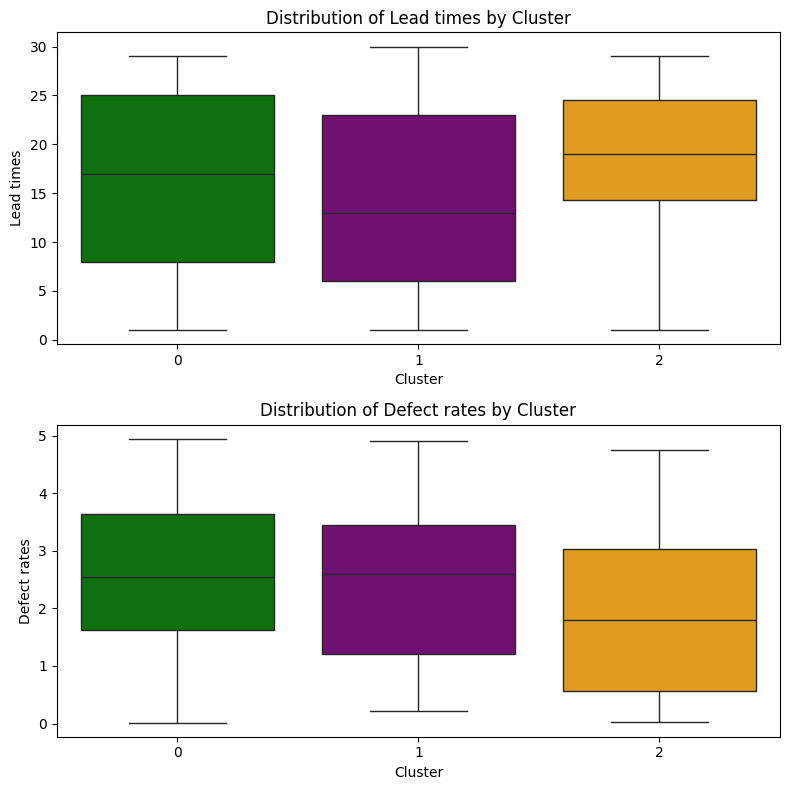

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defining a consistent color palette for clusters
cluster_colors = {0: 'green', 1: 'purple', 2: 'orange'}
cluster_palette = [cluster_colors[label] for label in sorted(cluster_colors)]

# Setting the data for box plots, using only the normalized and numerical features for simplicity
numerical_data = supply_chain_data[['Lead times', 'Defect rates', 'Cluster']]
numerical_data['Cluster'] = numerical_data['Cluster'].astype('category')  # Ensuring Cluster is categorical

# Creating box plots for the numerical features grouped by cluster
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
for i, col in enumerate(['Lead times', 'Defect rates']):
    sns.boxplot(x='Cluster', y=col, data=numerical_data, ax=axes[i], palette=cluster_palette)
    axes[i].set_title(f'Distribution of {col} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

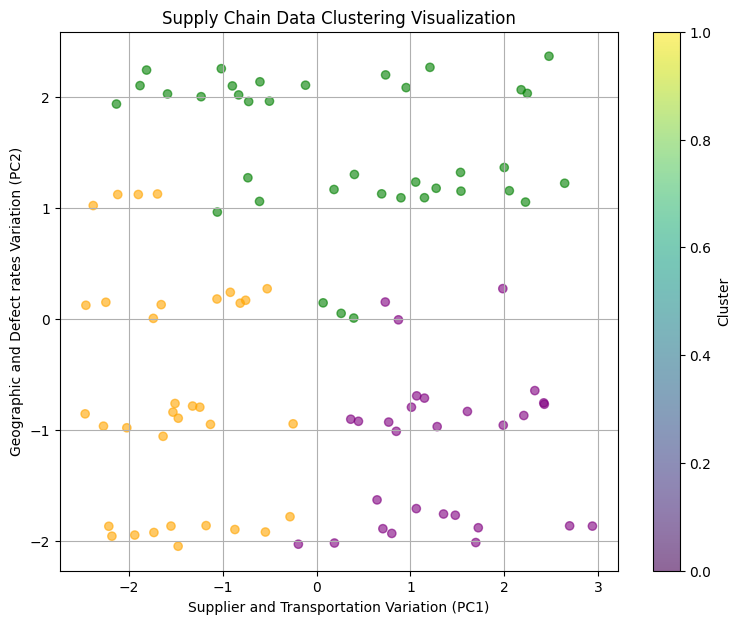

In [ ]:
from sklearn.decomposition import PCA

# PCA for dimensionality reduction to 2D for visualization
pca_supply_chain = PCA(n_components=2)
X_pca_supply_chain = pca_supply_chain.fit_transform(clustering_features)

# Computing PCA loadings to understand the contribution of each feature to the principal components
pca_loadings = pd.DataFrame(pca_supply_chain.components_, columns=clustering_features.columns, index=['PC1', 'PC2'])

# Display the loadings
pca_loadings

#plotting the PCA scatter plot with updated axis labels based on component interpretations
plt.figure(figsize=(9, 7))
scatter_supply_chain = plt.scatter(X_pca_supply_chain[:, 0], X_pca_supply_chain[:, 1], c=supply_chain_data['Cluster'].map(cluster_colors), alpha=0.6)
plt.title('Supply Chain Data Clustering Visualization')
plt.xlabel('Supplier and Transportation Variation (PC1)')
plt.ylabel('Geographic and Defect rates Variation (PC2)')
plt.colorbar(scatter_supply_chain, label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
# Computing PCA loadings to understand the contribution of each feature to the principal components
pca_loadings = pd.DataFrame(pca_supply_chain.components_, columns=clustering_features.columns, index=['PC1', 'PC2'])

# Display the loadings
pca_loadings

,Supplier name,Location,Lead times,Transportation modes,Defect rates
PC1,0.937950,0.022781,-0.095718,0.247818,0.221709
PC2,0.020746,-0.994894,0.083015,-0.002811,0.053440
